<a href="https://colab.research.google.com/github/shanksghub/CNN-Keras-practice/blob/main/keras%20practice%20classification%20error%20multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

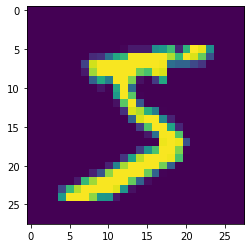

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
import matplotlib.pyplot as plt
%matplotlib inline
x_train.shape
single_image = x_train[0]
single_image

from keras.utils.np_utils import to_categorical

single_image.shape
plt.imshow(single_image)

y_train
y_test 
y_train.shape
y_example = to_categorical(y_train)
y_example 
y_example.shape
y_example[0]
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)
  

In [8]:
 
single_image.max()
 
single_image.min()
 
x_train = x_train/255
x_test = x_test/255
scaled_single = x_train[0]
scaled_single.max()
   
x_train.shape
x_test.shape

x_train = x_train.reshape(60000, 28, 28, 1)
x_train.shape
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary() 
model.fit(x_train,y_cat_train,epochs=2) 
model.metrics_names
model.evaluate(x_test,y_cat_test)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
________________________________________________

[2.3010668754577637, 0.11349999904632568]

In [12]:
from sklearn.metrics import classification_report
import numpy as np

In [20]:
predictions = (model.predict(x_test) > 0.5).astype("int32")


In [21]:
y_cat_test.shape 


(10000, 10)

In [22]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [23]:

predictions[0]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:

y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [25]:

print(classification_report(y_test,predictions))

ValueError: ignored

In [ ]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)